In [32]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
import pandas as pd

crystal_features = pd.read_csv('../data/crystal_pose_features.csv', index_col=0)
docked_features = pd.read_csv('../data/docked_pose_features.csv', index_col=0)
with open('../data/pdbbind_training_set.txt') as f:
    train_pdbs = [l.strip() for l in f]
with open('../data/pdbbind_test_set.txt') as f:
    test_pdbs = [l.strip() for l in f]
with open('../data/lb_feature_names.txt') as f:
    lb_features = [l.strip() for l in f]

In [2]:
docked_features

,6.6,6.7,6.8,6.9,6.15,6.16,6.17,6.35,6.53,7.6,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea,qed
5aml_0,2057.0,536.0,769.0,13.0,428.0,113.0,146.0,2.0,1212.0,337.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596466
5aml_1,1914.0,521.0,748.0,11.0,339.0,90.0,150.0,2.0,929.0,255.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596466
5aml_2,2142.0,605.0,780.0,11.0,349.0,91.0,127.0,2.0,1113.0,293.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596466
5aml_3,1725.0,455.0,732.0,11.0,247.0,67.0,118.0,2.0,993.0,254.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596466
5aml_4,1813.0,467.0,680.0,10.0,263.0,77.0,113.0,1.0,879.0,241.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2er9_15,5461.0,1239.0,2806.0,23.0,1188.0,271.0,663.0,1.0,1030.0,217.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065398
2er9_16,6530.0,1513.0,3214.0,4.0,1324.0,305.0,714.0,0.0,1248.0,288.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065398
2er9_17,5011.0,1134.0,2703.0,14.0,1207.0,265.0,671.0,4.0,1034.0,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065398
2er9_18,5097.0,1123.0,2744.0,18.0,1343.0,297.0,718.0,6.0,1173.0,267.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065398


In [8]:
top_pose_features = {}
for pdb in train_pdbs:
    top_pose_features[pdb] = docked_features.loc[pdb+'_0']
for pdb in test_pdbs:
    top_pose_features[pdb] = docked_features.loc[pdb+'_0']
top_pose_features = pd.DataFrame(top_pose_features).T

In [9]:
top_pose_features

,6.6,6.7,6.8,6.9,6.15,6.16,6.17,6.35,6.53,7.6,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea,qed
184l,2262.0,563.0,679.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.583095
185l,1825.0,459.0,555.0,21.0,233.0,57.0,73.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543916
186l,2237.0,559.0,701.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.595731
187l,1852.0,459.0,548.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475758
188l,1805.0,448.0,556.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4ivb,3170.0,865.0,1219.0,27.0,935.0,239.0,376.0,8.0,146.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.760116
2wn9,3146.0,765.0,1289.0,55.0,316.0,79.0,139.0,7.0,366.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.942803
1rnt,1149.0,321.0,483.0,0.0,445.0,127.0,207.0,0.0,824.0,233.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.452522
2jdm,618.0,209.0,564.0,0.0,0.0,0.0,0.0,0.0,494.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453282


In [10]:
lb_features = top_pose_features.loc[:, lb_features]

In [12]:
lb_features.to_csv('lb_features.csv')

In [19]:
rfv3_features = top_pose_features.columns.difference(lb_features.columns)
rfv3_features = [f for f in rfv3_features if 'intra' not in f and 'affinity' not in f]

In [18]:
crystal_features.loc[train_pdbs]

,16.15,16.16,16.17,16.35,16.53,16.6,16.7,16.8,16.9,6.15,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea,qed
184l,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.583095
185l,0,0,0,0,0,0,0,0,0,236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543916
186l,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.595731
187l,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475758
188l,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6upj,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865745
7std,0,0,0,0,0,3,0,0,0,250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.791879
7upj,0,0,0,0,0,0,0,0,0,150,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496968
8a3h,0,0,0,0,0,0,0,0,0,386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244351


In [15]:
len(train_pdbs) + len(test_pdbs)

4271

In [21]:
X_train_crystal = crystal_features.loc[train_pdbs, rfv3_features]
X_train_docked = top_pose_features.loc[train_pdbs, rfv3_features]
X_test_crystal = crystal_features.loc[test_pdbs, rfv3_features]
X_test_docked = top_pose_features.loc[test_pdbs, rfv3_features]

In [24]:
y_train = pd.read_csv('../data/pdbbind_training_set_binding_affinity.csv', index_col=0, header=None, squeeze=True).loc[train_pdbs]
y_test = pd.read_csv('../data/pdbbind_test_set_binding_affinity.csv', index_col=0, header=None, squeeze=True).loc[test_pdbs]

In [25]:
%%time
rf_crystal = RandomForestRegressor(n_estimators=500, max_features=0.33,random_state=42, n_jobs=8, oob_score=True)
rf_crystal.fit(X_train_crystal, y_train.values.ravel())
rf_docked = RandomForestRegressor(n_estimators=500, max_features=0.33,random_state=42, n_jobs=8, oob_score=True)
rf_docked.fit(X_train_docked, y_train.values.ravel())

CPU times: user 21.9 s, sys: 348 ms, total: 22.3 s
Wall time: 4.41 s


RandomForestRegressor(max_features=0.33, n_estimators=500, n_jobs=8,
                      oob_score=True, random_state=42)

In [26]:
predicted_crystal = rf_crystal.predict(X_test_crystal)
predicted_docked = rf_docked.predict(X_test_docked)

0.7649244756756857


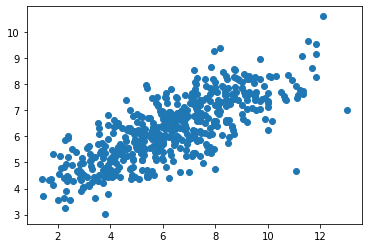

In [33]:
plt.scatter(y_test, predicted_crystal)
print(stats.pearsonr(y_test, predicted_crystal)[0])

0.6920100584112635


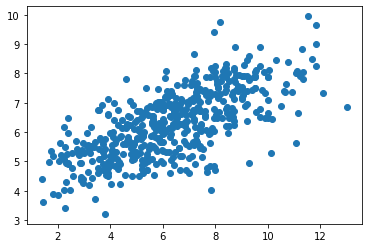

In [34]:
plt.scatter(y_test, predicted_docked)
print(stats.pearsonr(y_test, predicted_docked)[0])

In [35]:
X_train_rdk_crystal = pd.concat([X_train_crystal, lb_features.loc[train_pdbs]], axis='columns')
X_test_rdk_crystal = pd.concat([X_test_crystal, lb_features.loc[test_pdbs]], axis='columns')
X_train_rdk_docked = pd.concat([X_train_docked, lb_features.loc[train_pdbs]], axis='columns')
X_test_rdk_docked = pd.concat([X_test_docked, lb_features.loc[test_pdbs]], axis='columns')

In [37]:
rf_rdk_crystal = RandomForestRegressor(n_estimators=500, max_features=0.33,random_state=42, n_jobs=8, oob_score=True)
rf_rdk_crystal.fit(X_train_rdk_crystal, y_train.values.ravel())
rf_rdk_docked = RandomForestRegressor(n_estimators=500, max_features=0.33,random_state=42, n_jobs=8, oob_score=True)
rf_rdk_docked.fit(X_train_rdk_docked, y_train.values.ravel())

RandomForestRegressor(max_features=0.33, n_estimators=500, n_jobs=8,
                      oob_score=True, random_state=42)

In [38]:
predicted_rdk_crystal = rf_rdk_crystal.predict(X_test_rdk_crystal)
predicted_rdk_docked = rf_rdk_docked.predict(X_test_rdk_docked)

0.7846405364335337


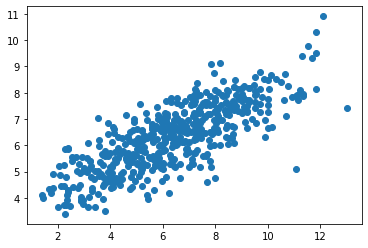

In [39]:
plt.scatter(y_test, predicted_rdk_crystal)
print(stats.pearsonr(y_test, predicted_rdk_crystal)[0])

0.755421999959667


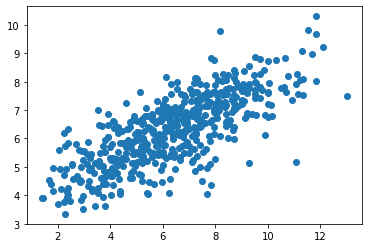

In [40]:
plt.scatter(y_test, predicted_rdk_docked)
print(stats.pearsonr(y_test, predicted_rdk_docked)[0])

In [44]:
pd.DataFrame({'Crystal': {'RFv3': 0.765, 'RFv3 + Ligand': 0.785}, 'Docked': {'RFv3': 0.692, 'RFv3 + Ligand': 0.756}}).T

,RFv3,RFv3 + Ligand
Crystal,0.765,0.785
Docked,0.692,0.756
